# 학습된 모델 저장

- 학습이 완료된 모델을 파일로 저장하여, 이후 추가 학습이나 예측 서비스에 사용할 수 있도록 한다.
- 파이토치(PyTorch)는 **모델의 파라미터만 저장**하는 방법과 **모델의 구조와 파라미터를 모두 저장**하는 두 가지 방식을 제공한다.
- 저장 함수
  - `torch.save(저장할 객체, 저장 경로)`
- 보통 저장 파일의 확장자는 `.pt`나 `.pth`를 사용한다.

## 모델 전체 저장 및 불러오기

- 저장하기
  - `torch.save(model, 저장 경로)`
- 불러오기
  - `load_model = torch.load(저장 경로)`
- 모델 저장 시 **피클(pickle)**을 사용해 직렬화되므로, 모델을 불러오는 실행 환경에도 저장할 때 사용한 클래스 정의가 필요하다.


## 모델의 파라미터만 저장

-   모델을 구성하는 파라미터만 저장한다.
-   모델의 구조는 저장하지 않기 때문에 불러올 때 **모델을 먼저 생성하고 생성한 모델에 불러온 파라미터를 덮어씌운다.**
-   모델의 파라미터는 **state_dict** 형식으로 저장한다.

### state_dict

-   모델의 파라미터 Tensor들을 레이어 단위별로 나누어 저장한 Ordered Dictionary (OrderedDict)
-   `모델객체.state_dict()` 메소드를 이용해 조회한다.
-   모델의 state_dict을 조회 후 저장한다.
    -   `torch.save(model.state_dict(), "저장경로")`
-   생성된 모델에 읽어온 state_dict를 덮어씌운다.
    -   `new_model.load_state_dict(torch.load("state_dict저장경로"))`


## Checkpoint 저장 및 불러오기

- 학습이 끝나지 않은 모델을 저장하고, 나중에 이어서 학습시키려면 모델의 구조와 파라미터뿐만 아니라 optimizer, loss 함수 등 학습에 필요한 객체들도 함께 저장해야 한다.
- 딕셔너리(Dictionary)에 저장하려는 값들을 key-value 쌍으로 구성하여 `torch.save()`를 이용해 저장한다.

```python
# 저장
torch.save({
    'epoch': epoch,
    'model_state_dict': model.state_dict(),
    'optimizer_state_dict': optimizer.state_dict(),
    'loss': train_loss
}, "저장경로")

# 불러오기
model = MyModel()
optimizer = optim.Adam(model.parameters())

# 불러온 checkpoint를 이용해 이전 학습 상태 복원
checkpoint = torch.load("저장경로")
model.load_state_dict(checkpoint['model_state_dict'])
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
epoch = checkpoint['epoch']
loss = checkpoint['loss']
```

In [ ]:
# 간단한 모델 정의
import torch
import torch.nn as nn

class MyModel(nn.Module):

    def __init__(self):
        super().__init__()
        self.lr1 = nn.Linear(3, 4) # 3 x 4 + 4 (Weight: Input개수 * Output개수, bias: Output개수)
        self.lr2 = nn.Linear(4, 2) # 4 x 2 + 2
        self.relu = nn.ReLU() # activation함수->파라미터가 없는 단순 계산함수. relu(X) = max(X, 0)
    def forward(self, X):
        X = self.lr1(X)
        X = self.relu(X)
        X = self.lr2(X)
        return X

In [ ]:
# 모델 생성성
model = MyModel()
model

MyModel(
  (lr1): Linear(in_features=3, out_features=4, bias=True)
  (lr2): Linear(in_features=4, out_features=2, bias=True)
  (relu): ReLU()
)

In [ ]:
# 레이어의 파라미터를 조회
# 모델에서 레이어객체를 조회
lr1 = model.lr1
lr1

Linear(in_features=3, out_features=4, bias=True)

In [ ]:
# 레이어에서 weight/bias 조회
w = lr1.weight
print(w.shape)
w

torch.Size([4, 3])


Parameter containing:
tensor([[ 0.1182, -0.5024, -0.4231],
        [ 0.2442,  0.5510, -0.0766],
        [ 0.3018,  0.0804, -0.2998],
        [-0.4359,  0.0421,  0.4237]], requires_grad=True)

In [ ]:
b = lr1.bias
print(b.shape)
b

torch.Size([4])


Parameter containing:
tensor([-0.4341,  0.1166,  0.5019,  0.5518], requires_grad=True)

In [ ]:
import os
os.makedirs("saved_models", exist_ok=True)

In [ ]:
################################################
#  모델을 저장
################################################
torch.save(model, "saved_models/my_model.pt")

In [ ]:
################################################
#  저장된 모델 Load
################################################
load_model = torch.load("saved_models/my_model.pt", weights_only=False)

In [ ]:
load_model

MyModel(
  (lr1): Linear(in_features=3, out_features=4, bias=True)
  (lr2): Linear(in_features=4, out_features=2, bias=True)
  (relu): ReLU()
)

In [ ]:
load_lr1 = load_model.lr1
lr1.weight

Parameter containing:
tensor([[ 0.1182, -0.5024, -0.4231],
        [ 0.2442,  0.5510, -0.0766],
        [ 0.3018,  0.0804, -0.2998],
        [-0.4359,  0.0421,  0.4237]], requires_grad=True)

In [ ]:
lr1.bias

Parameter containing:
tensor([-0.4341,  0.1166,  0.5019,  0.5518], requires_grad=True)

In [ ]:
################################################
#  모델에 Layer들을 조회. 모델.instance변수명
################################################
lr_layer = model.lr2
lr_layer

Linear(in_features=4, out_features=2, bias=True)

In [ ]:
################################################
#  Layer의 파라미터(weight/bias) 조회
################################################
lr1_weight = lr_layer.weight
lr1_bias = lr_layer.bias

In [ ]:
lr1_weight

Parameter containing:
tensor([[-0.4164,  0.4696,  0.0233,  0.4031],
        [ 0.3847, -0.0529,  0.0882, -0.0960]], requires_grad=True)

In [ ]:
lr1_bias

Parameter containing:
tensor([ 0.3716, -0.3975], requires_grad=True)

In [ ]:
######################################################
# 모델의 파라미터들(weight들, bias들)만 저장/불러오기
######################################################
state_dict = model.state_dict()
state_dict

OrderedDict([('lr1.weight',
              tensor([[ 0.1182, -0.5024, -0.4231],
                      [ 0.2442,  0.5510, -0.0766],
                      [ 0.3018,  0.0804, -0.2998],
                      [-0.4359,  0.0421,  0.4237]])),
             ('lr1.bias', tensor([-0.4341,  0.1166,  0.5019,  0.5518])),
             ('lr2.weight',
              tensor([[-0.4164,  0.4696,  0.0233,  0.4031],
                      [ 0.3847, -0.0529,  0.0882, -0.0960]])),
             ('lr2.bias', tensor([ 0.3716, -0.3975]))])

In [ ]:
state_dict.keys()

odict_keys(['lr1.weight', 'lr1.bias', 'lr2.weight', 'lr2.bias'])

In [ ]:
state_dict['lr1.bias']

tensor([-0.4341,  0.1166,  0.5019,  0.5518])

In [ ]:
###################
# state_dict 저장
###################

torch.save(state_dict, "saved_models/my_model_parameter.pt")

In [ ]:
#####################
# state_dict load
#####################
sd = torch.load("saved_models/my_model_parameter.pt")

In [ ]:
# load한 state_dict를 모델 파라미터에 적용(덮어 씌운다.)
new_model = MyModel()
new_model.state_dict()

OrderedDict([('lr1.weight',
              tensor([[ 0.4946, -0.1881, -0.2906],
                      [ 0.3572, -0.3518, -0.0322],
                      [ 0.4324, -0.4250,  0.1640],
                      [ 0.1107,  0.2065,  0.5298]])),
             ('lr1.bias', tensor([ 0.4650, -0.0652, -0.4243, -0.4428])),
             ('lr2.weight',
              tensor([[ 0.2751, -0.3926, -0.4087,  0.1688],
                      [-0.1865,  0.4473,  0.0923, -0.3348]])),
             ('lr2.bias', tensor([ 0.1144, -0.4082]))])

In [ ]:
sd

OrderedDict([('lr1.weight',
              tensor([[ 0.1182, -0.5024, -0.4231],
                      [ 0.2442,  0.5510, -0.0766],
                      [ 0.3018,  0.0804, -0.2998],
                      [-0.4359,  0.0421,  0.4237]])),
             ('lr1.bias', tensor([-0.4341,  0.1166,  0.5019,  0.5518])),
             ('lr2.weight',
              tensor([[-0.4164,  0.4696,  0.0233,  0.4031],
                      [ 0.3847, -0.0529,  0.0882, -0.0960]])),
             ('lr2.bias', tensor([ 0.3716, -0.3975]))])

In [ ]:
new_model.load_state_dict(sd)

<All keys matched successfully>

In [ ]:
new_model.state_dict()

OrderedDict([('lr1.weight',
              tensor([[ 0.1182, -0.5024, -0.4231],
                      [ 0.2442,  0.5510, -0.0766],
                      [ 0.3018,  0.0804, -0.2998],
                      [-0.4359,  0.0421,  0.4237]])),
             ('lr1.bias', tensor([-0.4341,  0.1166,  0.5019,  0.5518])),
             ('lr2.weight',
              tensor([[-0.4164,  0.4696,  0.0233,  0.4031],
                      [ 0.3847, -0.0529,  0.0882, -0.0960]])),
             ('lr2.bias', tensor([ 0.3716, -0.3975]))])

In [ ]:
model

MyModel(
  (lr1): Linear(in_features=3, out_features=4, bias=True)
  (lr2): Linear(in_features=4, out_features=2, bias=True)
  (relu): ReLU()
)

In [ ]:
# torchinof 패키지 설치: 파이토치 모델 구조를 조사해주는 패키지.
%pip install torchinfo

  Using cached torchinfo-1.8.0-py3-none-any.whl.metadata (21 kB)
Using cached torchinfo-1.8.0-py3-none-any.whl (23 kB)
Note: you may need to restart the kernel to use updated packages.


In [ ]:
from torchinfo import summary
summary(model)

Layer (type:depth-idx)                   Param #
MyModel                                  --
├─Linear: 1-1                            16
├─Linear: 1-2                            10
├─ReLU: 1-3                              --
Total params: 26
Trainable params: 26
Non-trainable params: 0

In [ ]:
# input data 의 shape을 지정하면 각 Layer의 output shape을 출력한다.
summary(model, (100, 3))

Layer (type:depth-idx)                   Output Shape              Param #
MyModel                                  [100, 2]                  --
├─Linear: 1-1                            [100, 4]                  16
├─ReLU: 1-2                              [100, 4]                  --
├─Linear: 1-3                            [100, 2]                  10
Total params: 26
Trainable params: 26
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 0.00
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.01

# 문제 유형별 MLP 네트워크
- 해결하려는 문제 유형에 따라 출력 Layer의 구조가 바뀐다.
- 딥러닝 구조에서 **Feature를 추출하는 Layer 들을 Backbone** 이라고 하고 **추론하는 Layer들을 Head** 라고 한다.


> - MLP(Multi Layer Perceptron), DNN(Deep Neural Network), ANN(Artificial Neural Network)
>     -   Fully Connected Layer(nn.Linear)로 구성된 딥러닝 모델
>     -   input feature들 모두에 대응하는 weight들(가중치)을 사용한다.
>

## Boston Housing Dataset - **Regression(회귀) 문제**

보스턴 주택가격 dataset은 다음과 같은 속성을 바탕으로 해당 타운 주택 가격의 중앙값을 예측하는 문제.

-   CRIM: 범죄율
-   ZN: 25,000 평방피트당 주거지역 비율
-   INDUS: 비소매 상업지구 비율
-   CHAS: 찰스강에 인접해 있는지 여부(인접:1, 아니면:0)
-   NOX: 일산화질소 농도(단위: 0.1ppm)
-   RM: 주택당 방의 수
-   AGE: 1940년 이전에 건설된 주택의 비율
-   DIS: 5개의 보스턴 직업고용센터와의 거리(가중 평균)
-   RAD: 고속도로 접근성
-   TAX: 재산세율
-   PTRATIO: 학생/교사 비율
-   B: 흑인 비율
-   LSTAT: 하위 계층 비율
    <br><br>
-   **Target**
    -   MEDV: 타운의 주택가격 중앙값(단위: 1,000달러)


In [2]:
%pip install torchinfo

In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn # Layer들을 정의한 모듈
from torch.utils.data import TensorDataset, DataLoader
import torchinfo

In [99]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [100]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [101]:
# Dataset 읽어오기
data_path = "data/boston_hosing.csv"
data_path = "/content/drive/MyDrive/09_딥러닝 기본/data/boston_hosing.csv"

data = pd.read_csv(data_path)
data.shape

(506, 14)

In [102]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [103]:
X = data.drop(columns='MEDV').values
y = data['MEDV'].values.reshape(-1, 1)

In [104]:
# train/test set 분리
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0
)
X_train.shape, X_test.shape, y_train.shape, y_test.shape
# ((404, 13), (102, 13), (404, 1), (102, 1))

((404, 13), (102, 13), (404, 1), (102, 1))

In [105]:
# Feature Scaling - Standard Scaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [106]:
X_train_scaled.dtype

dtype('float64')

In [107]:
###############
# Dataset 생성
# X, y가 ndarray 타입으로 메모리에 있는 경우 => TensorDataset
###############
trainset = TensorDataset(
    #모델 파파미터와 타입을 동일하게 설정.
    torch.tensor(X_train_scaled, dtype=torch.float32),
    torch.tensor(y_train, dtype=torch.float32)
)
testset = TensorDataset(
    torch.tensor(X_test_scaled, dtype=torch.float32),
    torch.tensor(y_test, dtype=torch.float32)
)

In [108]:
len(trainset), len(testset)

(404, 102)

In [109]:
trainset[0]

(tensor([-0.3726, -0.4996, -0.7049,  3.6645, -0.4249,  0.9357,  0.6937, -0.4372,
         -0.1622, -0.5617, -0.4846,  0.3717, -0.4110]),
 tensor([26.7000]))

In [110]:
##################
# DataLoader 생성
##################
train_loader = DataLoader(
    trainset, batch_size=100, shuffle=True, drop_last=True
)
test_loader = DataLoader(testset, batch_size=102)

In [111]:
# epoch당 step수
len(train_loader), len(test_loader)

(4, 1)

In [5]:
###################
# 모델 정의
###################
class BostonModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.lr1 = nn.Linear(13, 32) # 13(in_features): X의 feature개수
        self.lr2 = nn.Linear(32, 16)
        self.lr3 = nn.Linear(16, 1)  # 1 (out_features): 예측할 y의 개수(집값)

    def forward(self, X):
        # lr1 -> relu -> lr2 -> relu -> lr3
        X = self.lr1(X)
        X = nn.ReLU()(X)
        X = self.lr2(X)
        X = nn.ReLU()(X)
        X = self.lr3(X)
        return X

In [6]:
boston_model = BostonModel()
torchinfo.summary(boston_model, (100, 13))
# (100:batch_size, 13: feature 수)

Layer (type:depth-idx)                   Output Shape              Param #
BostonModel                              [100, 1]                  --
├─Linear: 1-1                            [100, 32]                 448
├─Linear: 1-2                            [100, 16]                 528
├─Linear: 1-3                            [100, 1]                  17
Total params: 993
Trainable params: 993
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 0.10
Input size (MB): 0.01
Forward/backward pass size (MB): 0.04
Params size (MB): 0.00
Estimated Total Size (MB): 0.05

In [ ]:
#################
# 학습
#################
# 필요할 객체들 생성 - model, loss함수, optimizer
# device로 옮길 대상: model, x, y
boston_model = BostonModel()
boston_model = boston_model.to(device)
loss_fn = nn.MSELoss() # 회귀의 loss함수 -> MSE
optimizer = torch.optim.RMSprop(boston_model.parameters(), lr=0.01)
# 옵티마이저 파라미터(모델의 파라미터, 학습률)

In [ ]:
# 학습:  train + validation

train_loss_list = []
valid_loss_list = []

for epoch in range(1000):  # 1000에폭 학습.
    ######################
    # train
    ######################
    boston_model.train()
    train_loss = 0.0 # 현재 epoch loss를 저장할 함수.
    # step단위로 학습.
    for X_train, y_train in train_loader:
        # 1 batch 학습 == 1 Step
        # 1. X, y를 device로 옮기
        X_train, y_train = X_train.to(device), y_train.to(device)

        # 2. 모델을 이용해서 추정
        pred = boston_model(X_train)

        # 3. Loss 계산
        loss = loss_fn(pred, y_train) # (모델추정값, 정답)

        # 4. gradient 계산
        loss.backward()

        # 5. weight/bias update
        optimizer.step()

        # 6. gradient 초기화
        optimizer.zero_grad()

        train_loss += loss.item()

    train_loss /= len(train_loader) # 1 에폭 loss 결과 저장.

    ######################
    # validation
    ######################
    boston_model.eval()
    valid_loss = 0.0
    with torch.no_grad():
        for X_test, y_test in test_loader:
            # 1. X, y를 device로 옮기기.
            X_test, y_test = X_test.to(device), y_test.to(device)

            # 2. 추정
            pred_test = boston_model(X_test)

            # 3. 검증 - loss 계산.
            valid_loss += loss_fn(pred_test, y_test).item()

        valid_loss /= len(test_loader)

    # 현재 epoch 학습 결과를 출력
    print(f"[{epoch+1}/1000] train loss: {train_loss:.5f}, valid loss: {valid_loss:.5f}")
    train_loss_list.append(train_loss)
    valid_loss_list.append(valid_loss)


[1/1000] train loss: 570.67377, valid loss: 527.22186
[2/1000] train loss: 527.82892, valid loss: 466.85306
[3/1000] train loss: 446.39790, valid loss: 364.62421
[4/1000] train loss: 324.10976, valid loss: 229.58211
[5/1000] train loss: 174.44072, valid loss: 120.73502
[6/1000] train loss: 92.00523, valid loss: 117.88840
[7/1000] train loss: 101.57580, valid loss: 105.06705
[8/1000] train loss: 68.12966, valid loss: 61.09102
[9/1000] train loss: 33.15622, valid loss: 53.09137
[10/1000] train loss: 30.89159, valid loss: 52.40312
[11/1000] train loss: 27.53714, valid loss: 44.63232
[12/1000] train loss: 20.89509, valid loss: 40.67122
[13/1000] train loss: 21.23802, valid loss: 40.23915
[14/1000] train loss: 20.79331, valid loss: 37.13201
[15/1000] train loss: 17.74723, valid loss: 34.23205
[16/1000] train loss: 16.71534, valid loss: 33.16691
[17/1000] train loss: 15.81131, valid loss: 31.48139
[18/1000] train loss: 14.69502, valid loss: 30.22983
[19/1000] train loss: 14.31299, valid loss

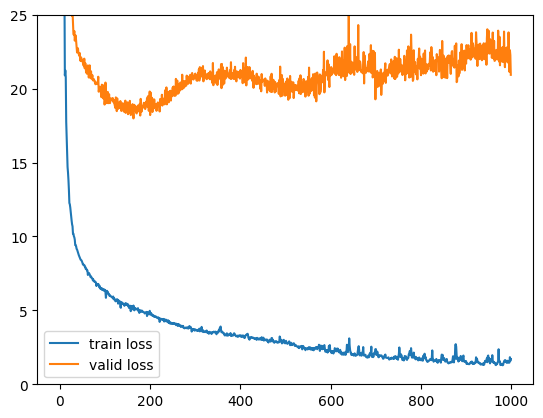

In [121]:
# epoch별 loss 변화를 시각화
plt.plot(range(1000), train_loss_list, label="train loss")
plt.plot(range(1000), valid_loss_list, label="valid loss")
plt.ylim(0, 25)
# plt.xlim(200, 250)
plt.legend()
plt.show()

In [124]:
########################
# 모델 저장 - 불러오기
########################
import os
# 코랩-구글드라이브에 저장.
os.makedirs('saved_model', exist_ok=True)
torch.save(boston_model, "saved_model/boston_model.pt")

In [126]:
load_boston_model = torch.load(
    "saved_model/boston_model.pt", weights_only=False
)

In [127]:
############################
# 파라미터만 저장 - 불러오기
############################
# state_dict를 조회
torch.save(
    boston_model.state_dict(), "saved_model/boston_model_state_dict.pt"
)

In [128]:
load_sd = torch.load("saved_model/boston_model_state_dict.pt")
load_boston_model2 = BostonModel()
load_boston_model2.load_state_dict(load_sd)

<All keys matched successfully>

In [132]:
####################
# 최종 평가
####################
test_loss = 0.0
with torch.no_grad():
    for X_test, y_test in test_loader:
        # device로 이동
        X_test, y_test = X_test.to(device), y_test.to(device)
        # 추론
        # pred_test = boston_model(X_test)
        pred_test = load_boston_model2(X_test)
        # loss 계산
        loss_test = loss_fn(pred_test, y_test)
        test_loss += loss_test.item()

    test_loss /= len(test_loader)

print(test_loss)

20.931360244750977


In [136]:
# 추론
new_X, _ = trainset[:5]
load_boston_model.eval()
with torch.no_grad():
    new_y = load_boston_model(new_X)

In [137]:
new_y

# tensor([[26.5098],
#         [21.0406],
#         [23.0117],
#         [21.2224],
#         [10.2827]])

tensor([[26.5098],
        [21.0406],
        [23.0117],
        [21.2224],
        [10.2827]])

## 분류 (Classification)

### Fashion MNIST Dataset - **다중분류(Multi-Class Classification) 문제**

10개의 범주(category)와 70,000개의 흑백 이미지로 구성된 [패션 MNIST](https://github.com/zalandoresearch/fashion-mnist) 데이터셋.
이미지는 해상도(28x28 픽셀)가 낮고 다음처럼 개별 의류 품목을 나타낸다:

<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <b>그림</b> <a href="https://github.com/zalandoresearch/fashion-mnist">패션-MNIST 샘플</a> (Zalando, MIT License).<br/>&nbsp;
  </td></tr>
</table>

- **Feature**이미지는 28x28 크기이며 Gray scale이다.
- **Target**은 총 10개의 class로 구성되어 있으며 각 class의 class 이름은 다음과 같다.

| 레이블 | 클래스       |
|--------|--------------|
| 0      | T-shirt/top |
| 1      | Trousers    |
| 2      | Pullover    |
| 3      | Dress       |
| 4      | Coat        |
| 5      | Sandal      |
| 6      | Shirt       |
| 7      | Sneaker     |
| 8      | Bag         |
| 9      | Ankle boot  |

> #### 학습 도중 모델 저장
>
> - 학습 도중 가장 좋은 성능을 보이는 모델이 나올 수 있다.
> - 학습 도중 모델을 저장하는 방법
>   1. 각 에폭이 끝날 때 마다 모델을 저장한다.
>   2. 한 에폭 학습 후 성능 개선이 있으면 모델을 저장하여 가장 성능 좋은 모델만 저장되도록 한다.
>      - 최고 성능 점수(best score)와 현재 에폭의 성능을 비교하여, 성능이 개선되었을 경우 모델을 저장(덮어쓰기)한다.
>
> #### 조기 종료(Early Stopping)
>
> - 학습 도중 성능 개선이 나타나지 않으면, 중간에 학습을 종료하도록 구현한다.
> - 에폭 수를 충분히 길게 설정한 뒤, 특정 횟수 동안 성능 개선이 없으면 학습을 조기 종료하도록 구현한다.


In [8]:
import torch
import torch.nn as nn
from torchvision import datasets, transforms

device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

cpu


In [9]:
########################
# Dataset loading
fmnist_trainset = datasets.FashionMNIST(
    root="data", train=True, download=True,
    transform=transforms.ToTensor()
)
fmnist_testset = datasets.FashionMNIST(
    root="data", train=False, download=True,
    transform=transforms.ToTensor()
)

100.0%
100.0%
100.0%
100.0%


In [148]:
fmnist_trainset

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [149]:
fmnist_testset

Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [150]:
fmnist_trainset[0]
# (<PIL.Image.Image image mode=L size=28x28>, 9)

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [145]:
idx = 10
fmnist_trainset[idx][0]

In [151]:
len(fmnist_trainset)

60000

In [153]:
# trainset -> trainset/validationset으로 분리
fmnist_trainset, fmnist_validset = torch.utils.data.random_split(
    fmnist_trainset, [50000, 10000]
)

In [154]:
len(fmnist_trainset), len(fmnist_validset), len(fmnist_testset)

(50000, 10000, 10000)

In [155]:
fmnist_testset.class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [156]:
fmnist_testset.classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [157]:
##############
# DataLoader
##############
train_loader = torch.utils.data.DataLoader(
    fmnist_trainset, batch_size=200, shuffle=True, drop_last=True
)
valid_loader = torch.utils.data.DataLoader(
    fmnist_validset, batch_size=200
)
test_loader = torch.utils.data.DataLoader(
    fmnist_testset, batch_size=200
)

In [12]:
#########################
# 모델 정의
#########################
class FMNISTModel(nn.Module):

    def __init__(self):
        super().__init__()
        self.lr1 = nn.Linear(28*28, 512)
        self.lr2 = nn.Linear(512, 256)
        self.lr3 = nn.Linear(256, 128)
        self.lr4 = nn.Linear(128, 64)
        self.lr5 = nn.Linear(64, 10) #출력->class개수
        self.relu = nn.ReLU()

    def forward(self, X):
        """
        X: 입력 tensor - shape: [batch_size, 1, 28, 28]
        """
        # 1. flatten -> 3차원 입력을 1차원으로 변환.
        # torch.flatten(X, start_dim=1)
        X = nn.Flatten()(X) # 1축 이후를 flatten

        X = self.lr1(X)
        X = self.relu(X)

        X = self.lr2(X)
        X = self.relu(X)

        X = self.lr3(X)
        X = self.relu(X)

        X = self.lr4(X)
        X = self.relu(X)

        out = self.lr5(X)  # CrossEntropyLoss() -> Linear 출력결과를 그대로 반환.(Softmax를 적용안함.)
        return out

In [165]:
# 모델 구조 확인
m = FMNISTModel()
m

FMNISTModel(
  (lr1): Linear(in_features=784, out_features=512, bias=True)
  (lr2): Linear(in_features=512, out_features=256, bias=True)
  (lr3): Linear(in_features=256, out_features=128, bias=True)
  (lr4): Linear(in_features=128, out_features=64, bias=True)
  (lr5): Linear(in_features=64, out_features=10, bias=True)
  (relu): ReLU()
)

In [168]:
from torchinfo import summary
summary(m, (200, 1, 28, 28), device=device)

Layer (type:depth-idx)                   Output Shape              Param #
FMNISTModel                              [200, 10]                 --
├─Linear: 1-1                            [200, 512]                401,920
├─ReLU: 1-2                              [200, 512]                --
├─Linear: 1-3                            [200, 256]                131,328
├─ReLU: 1-4                              [200, 256]                --
├─Linear: 1-5                            [200, 128]                32,896
├─ReLU: 1-6                              [200, 128]                --
├─Linear: 1-7                            [200, 64]                 8,256
├─ReLU: 1-8                              [200, 64]                 --
├─Linear: 1-9                            [200, 10]                 650
Total params: 575,050
Trainable params: 575,050
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 115.01
Input size (MB): 0.63
Forward/backward pass size (MB): 1.55
Params size (MB): 2.30
Estimated 

In [180]:
##################
# 학습
##################
LR = 0.001
EPOCHS = 20

fmnist_model = FMNISTModel().to(device)
optimizer = torch.optim.Adam(fmnist_model.parameters(), lr=LR)
loss_fn = nn.CrossEntropyLoss()
# 다중 분류 loss: categorical crossentropy
## CrossEntropyLoss:
#1. y정답을 one hot encoding
#2. pred 예측값에 softmax를 적용
#3. categorical crossentrpy 계산

In [181]:
########### 학습

import time

train_loss_list = []
valid_loss_list = []
valid_acc_list = []

#######################################
# 1. 학습 도중 이전 epoch들 보다 성능이 개선되면 모델을 저장
# 2. 특정 epoch 동안 성능 개선이 없으면 학습을 중지
#######################################
# 변수들 선언
import os
os.makedirs("saved_models", exist_ok=True)
saved_path = "saved_models/fashion_mnist_model.pt"
best_score = torch.inf # 현재 가장 좋은 평가지표(loss).
#  best_score > 검증loss (성능개선) -> 모델 저장.

## 조기종료 관련 변수
patience = 5 # 성능이 개선될지 몇 에폭을 기다릴지.
trigger_cnt = 0 # 몇 에폭째 기다리는지 저장할 변수.


s = time.time()

####### train 코드 작성.
EPOCHS = 100
for epoch in range(EPOCHS):
    # 학습
    fmnist_model.train()
    train_loss = 0.0
    for X_train, y_train in train_loader:
        # device로 이동
        X_train, y_train = X_train.to(device), y_train.to(device)

        # 추론
        pred_train = fmnist_model(X_train)

        # loss 계산
        loss = loss_fn(pred_train, y_train)

        # gradient 계산
        loss.backward()

        # 파라미터 업데이트
        optimizer.step()

        # gradient 초기화
        optimizer.zero_grad()

        train_loss += loss.item()

    train_loss /= len(train_loader)
    train_loss_list.append(train_loss)

    # 검증
    fmnist_model.eval()
    valid_loss = 0.0
    valid_acc = 0.0
    with torch.no_grad():
        for X_valid, y_valid in valid_loader:
            # 이동
            X_valid, y_valid = X_valid.to(device), y_valid.to(device)

            # 추론
            pred_valid = fmnist_model(X_valid)

            # 검증
            ## loss
            valid_loss += loss_fn(pred_valid, y_valid).item()
            ## 정확도
            # 모델이 예측한 정답 class -> 10개 출력값 중 가장 큰 값이 있는 index
            pred_class = pred_valid.argmax(dim=-1)
            valid_acc += torch.sum(pred_class == y_valid).item()

        valid_loss /= len(valid_loader) # step수로 나눠서 평균계산.
        valid_acc /= len(fmnist_validset) # 총 데이터개수
        valid_loss_list.append(valid_loss)
        valid_acc_list.append(valid_acc)

        print(f"[{epoch+1}/{EPOCHS}] train loss: {train_loss}, valid loss: {valid_loss}, valid acc: {valid_acc}")

    ## 한 에폭 학습/검증 종료 후 모델 저장(성능개선시),
    #                                        조기종료(성능개선이 안된 경우)
    if valid_loss < best_score: # 이전 에폭의 결과보다 성능 개선됨.
        # 모델 저장
        torch.save(fmnist_model, saved_path)
        best_score = valid_loss
        print(f">>>>>>>>>>{epoch+1} 에폭에서 저장. {best_score}에서 {valid_loss}만큼 validation loss가 개선됨.")
        trigger_cnt = 0
        # 조기종료를 위해서 성능개선을 기다리는 에폭수. 성능이 개선됐으므로 0으로 초기화
    else:
        # 조기종료 처리.
        trigger_cnt += 1
        if patience == trigger_cnt:
            print(f"============{epoch+1}에폭에서 조기 종료")
            break

e = time.time()
print(f'학습에 걸린 총 시간: {e-s}초')

[1/100] train loss: 0.6909856842756271, valid loss: 0.4435706722736359, valid acc: 0.842
>>>>>>>>>>1 에폭에서 저장. 0.4435706722736359에서 0.4435706722736359만큼 validation loss가 개선됨.
[2/100] train loss: 0.41600893962383273, valid loss: 0.3957969707250595, valid acc: 0.8572
>>>>>>>>>>2 에폭에서 저장. 0.3957969707250595에서 0.3957969707250595만큼 validation loss가 개선됨.
[3/100] train loss: 0.36363321864604947, valid loss: 0.37852869093418123, valid acc: 0.8629
>>>>>>>>>>3 에폭에서 저장. 0.37852869093418123에서 0.37852869093418123만큼 validation loss가 개선됨.
[4/100] train loss: 0.3358773491382599, valid loss: 0.3475519070029259, valid acc: 0.8766
>>>>>>>>>>4 에폭에서 저장. 0.3475519070029259에서 0.3475519070029259만큼 validation loss가 개선됨.
[5/100] train loss: 0.3129865292906761, valid loss: 0.32284657537937167, valid acc: 0.8831
>>>>>>>>>>5 에폭에서 저장. 0.32284657537937167에서 0.32284657537937167만큼 validation loss가 개선됨.
[6/100] train loss: 0.29860647362470627, valid loss: 0.35946077823638917, valid acc: 0.8712
[7/100] train loss: 0.2894

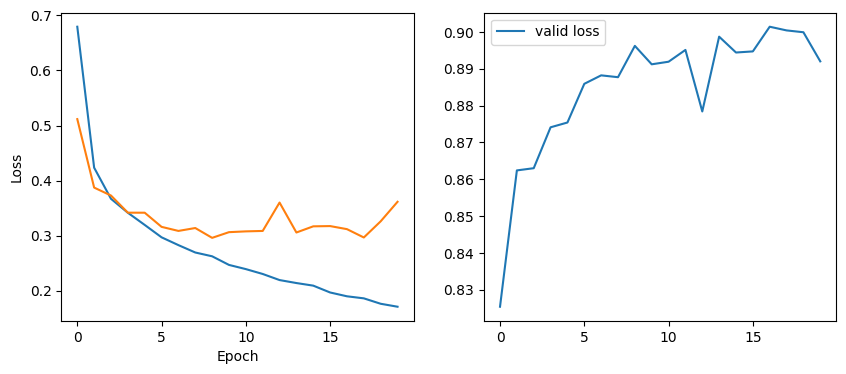

In [174]:
# 결과 시각화
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), train_loss_list, label="train loss")
plt.plot(range(EPOCHS), valid_loss_list, label="valid loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), valid_acc_list, label='valid loss')

plt.legend()
plt.show()

In [178]:
import numpy as np
np.min(valid_loss_list), np.argmin(valid_loss_list)

(np.float64(0.2961127930879593), np.int64(8))

(np.float64(0.2961127930879593), np.int64(8))

In [182]:
###########################
# 최종 평가
###########################
with torch.no_grad():
    test_loss = 0.0
    test_acc = 0.0
    for X_test, y_test in test_loader:
        X_test, y_test = X_test.to(device), y_test.to(device)
        pred_test = fmnist_model(X_test)
        test_loss += loss_fn(pred_test, y_test).item()
        test_acc += torch.sum(pred_test.argmax(dim=-1) == y_test).item()
    test_loss /= len(test_loader)
    test_acc /= len(fmnist_testset)

In [183]:
print(test_loss)
print(test_acc)
# 0.349494885802269
# 0.8825

0.349494885802269
0.8825


In [13]:
load_fmodel = torch.load("fashion_mnist_model.pt", weights_only=False)
load_fmodel

FMNISTModel(
  (lr1): Linear(in_features=784, out_features=512, bias=True)
  (lr2): Linear(in_features=512, out_features=256, bias=True)
  (lr3): Linear(in_features=256, out_features=128, bias=True)
  (lr4): Linear(in_features=128, out_features=64, bias=True)
  (lr5): Linear(in_features=64, out_features=10, bias=True)
  (relu): ReLU()
)

In [18]:
dataloader = torch.utils.data.DataLoader(fmnist_testset, batch_size=50)
x, y = next(iter(dataloader))
x.shape, y.shape

(torch.Size([50, 1, 28, 28]), torch.Size([50]))

In [22]:
with torch.no_grad():
    pred_logit = load_fmodel(x)
    result = torch.max(pred_logit, dim=-1)

In [ ]:
print(result.values)

tensor([ 6.6165, 10.2547, 17.5566, 15.8298,  5.5867, 12.9642, 12.3320, 12.8852,
        12.3735,  7.2927,  5.8394,  8.4934,  5.0595,  6.3468,  5.9614,  9.6942,
         8.1569,  6.4463, 11.1379,  5.2048,  3.2624,  4.3939,  7.9788,  5.0826,
        16.5399,  5.5271,  7.8283,  4.4728,  5.8460,  2.2570, 18.4551, 14.1004,
         4.2600,  3.6490, 22.8172,  8.0234,  6.0692,  9.5096,  7.7339, 10.2880,
         6.9833, 14.9835,  5.2897,  5.6794,  8.4235,  5.0249,  3.5945,  8.6214,
         5.4602,  4.6217])


In [38]:
# 확률값으로 변환 - softmax
pred_proba = nn.Softmax(dim=-1)(pred_logit)
r = torch.max(pred_proba, dim=-1)
for a in zip(r.values, r.indices):
    print(a)

(tensor(0.9906), tensor(9))
(tensor(0.9958), tensor(2))
(tensor(1.), tensor(1))
(tensor(1.), tensor(1))
(tensor(0.7736), tensor(6))
(tensor(1.0000), tensor(1))
(tensor(0.9996), tensor(4))
(tensor(0.9994), tensor(6))
(tensor(1.0000), tensor(5))
(tensor(0.9984), tensor(7))
(tensor(0.9165), tensor(4))
(tensor(0.9999), tensor(5))
(tensor(0.5519), tensor(7))
(tensor(0.9979), tensor(3))
(tensor(0.8424), tensor(4))
(tensor(1.0000), tensor(1))
(tensor(0.9948), tensor(2))
(tensor(0.8746), tensor(2))
(tensor(1.0000), tensor(8))
(tensor(0.9471), tensor(0))
(tensor(0.7399), tensor(2))
(tensor(0.6761), tensor(5))
(tensor(0.9997), tensor(7))
(tensor(0.9855), tensor(5))
(tensor(1.), tensor(1))
(tensor(0.7187), tensor(2))
(tensor(0.9264), tensor(6))
(tensor(0.8197), tensor(0))
(tensor(0.9780), tensor(9))
(tensor(0.4040), tensor(3))
(tensor(1.), tensor(8))
(tensor(1.0000), tensor(8))
(tensor(0.9744), tensor(3))
(tensor(0.8790), tensor(3))
(tensor(1.), tensor(8))
(tensor(0.9943), tensor(0))
(tensor(0.99

In [39]:
def predict(model, x):
    with torch.no_grad():
        pred = model(x)
        pred_proba = nn.Softmax(dim=-1)(pred)
        result = torch.max(pred_proba, dim=-1)
        return [(idx.item(), proba.item()) for idx, proba in zip(result.indices, result.values)]

In [40]:
result = predict(load_fmodel, x)

In [41]:
result

[(9, 0.9905555844306946),
 (2, 0.9958310723304749),
 (1, 1.0),
 (1, 1.0),
 (6, 0.7735845446586609),
 (1, 0.9999996423721313),
 (4, 0.9995827078819275),
 (6, 0.9994454979896545),
 (5, 0.9999996423721313),
 (7, 0.9984103441238403),
 (4, 0.9164848923683167),
 (5, 0.9999071359634399),
 (7, 0.5518661737442017),
 (3, 0.9979277849197388),
 (4, 0.8423774838447571),
 (1, 0.9999840259552002),
 (2, 0.994787335395813),
 (2, 0.8745715022087097),
 (8, 0.9999815225601196),
 (0, 0.9470783472061157),
 (2, 0.7399144768714905),
 (5, 0.6761211156845093),
 (7, 0.9997068047523499),
 (5, 0.9854647517204285),
 (1, 1.0),
 (2, 0.7186679840087891),
 (6, 0.9263898134231567),
 (0, 0.819709300994873),
 (9, 0.9779600501060486),
 (3, 0.4039537310600281),
 (8, 1.0),
 (8, 0.9999992847442627),
 (3, 0.9743779897689819),
 (3, 0.8789570927619934),
 (8, 1.0),
 (0, 0.9943010807037354),
 (7, 0.9981901049613953),
 (5, 0.9999299049377441),
 (7, 0.9994679093360901),
 (9, 0.9998764991760254),
 (0, 0.9349932670593262),
 (1, 1.0),


### 위스콘신 유방암 데이터셋 - **이진분류(Binary Classification) 문제**

-   **이진 분류 문제 처리 모델의 두가지 방법**
    1. positive(1)일 확률을 출력하도록 구현
        - output layer: units=1, activation='sigmoid'
        - loss: binary_crossentropy
    2. negative(0)일 확률과 positive(1)일 확률을 출력하도록 구현 => 다중분류 처리 방식으로 해결
        - output layer: units=2, activation='softmax', y(정답)은 one hot encoding 처리
        - loss: categorical_crossentropy
-   위스콘신 대학교에서 제공한 종양의 악성/양성여부 분류를 위한 데이터셋
-   Feature
    -   종양에 대한 다양한 측정값들
-   Target의 class
    -   0 - malignant(악성종양)
    -   1 - benign(양성종양)


In [42]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

import numpy as np
import matplotlib.pyplot as plt

device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

cpu


In [44]:
# Dataset
X, y = load_breast_cancer(return_X_y=True)
print(y.shape)
y = y.reshape(-1, 1)
print(y.shape)
# X.shape, y.shape, X.dtype
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25, random_state=0)

(569,)
(569, 1)


In [45]:
# 전처리
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [46]:
# class name <-> class index
classes = np.array(["악성종양", "양성종양"])
class_to_idx = {"악성종양":0, "양성종양":1}

In [47]:
# Dataset
## 모델의 weight, bias -> float32. X, y는 weight, bias와 계산을 하게 되기 때문에 타입을 맞춰준다.
trainset = TensorDataset(
    torch.tensor(X_train_scaled, dtype=torch.float32),
    torch.tensor(y_train, dtype=torch.float32)
)
testset = TensorDataset(
    torch.tensor(X_test_scaled, dtype=torch.float32),
    torch.tensor(y_test, dtype=torch.float32)
)

In [49]:
trainset.classes = classes
trainset.class_to_idx = class_to_idx

In [51]:
# DataLoader
train_loader = DataLoader(trainset, batch_size=200, shuffle=True, drop_last=True)
test_loader = DataLoader(testset, batch_size=100)

In [52]:
X_train.shape

(426, 30)

In [53]:
######### 모델 정의
class BreastCancerModel(nn.Module):

    def __init__(self):
        super().__init__()
        self.lr1 = nn.Linear(30, 32)
        self.lr2 = nn.Linear(32, 8)
        self.lr3 = nn.Linear(8, 1) # 출력 Layer 처리하는 함수. out_features=1 : positive일 확률.
        self.relu = nn.ReLU()
        self.logistic = nn.Sigmoid() # 입력값을 0 ~ 1 사이 실수로 반환.

    def forward(self, X):
        X = self.lr1(X)
        X = self.relu(X)
        X = self.lr2(X)
        X = self.relu(X)
        # 출력 Layer
        output = self.lr3(X)
        output = self.logistic(output)
        return output

In [54]:
b_model = BreastCancerModel()
b_model

BreastCancerModel(
  (lr1): Linear(in_features=30, out_features=32, bias=True)
  (lr2): Linear(in_features=32, out_features=8, bias=True)
  (lr3): Linear(in_features=8, out_features=1, bias=True)
  (relu): ReLU()
  (logistic): Sigmoid()
)

In [55]:
from torchinfo import summary
summary(b_model, (10, 30), device=device)

Layer (type:depth-idx)                   Output Shape              Param #
BreastCancerModel                        [10, 1]                   --
├─Linear: 1-1                            [10, 32]                  992
├─ReLU: 1-2                              [10, 32]                  --
├─Linear: 1-3                            [10, 8]                   264
├─ReLU: 1-4                              [10, 8]                   --
├─Linear: 1-5                            [10, 1]                   9
├─Sigmoid: 1-6                           [10, 1]                   --
Total params: 1,265
Trainable params: 1,265
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 0.01
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.01
Estimated Total Size (MB): 0.01

In [57]:
# dummy data로 출력
dummy_x = torch.randn(10, 30)
# dummy_x.shape
result = b_model(dummy_x)
print(result.shape)
result

torch.Size([10, 1])


tensor([[0.4373],
        [0.4188],
        [0.4377],
        [0.4230],
        [0.4423],
        [0.4313],
        [0.4651],
        [0.4278],
        [0.4373],
        [0.4494]], grad_fn=<SigmoidBackward0>)

In [60]:
(result > 0.5).type(torch.int32)  # bool -> int (True: 1, False: 0)

tensor([[0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0]], dtype=torch.int32)

In [61]:
lr = 0.001
epochs = 1000
######## 학습(train)
b_model = b_model.to(device)
optimizer = optim.Adam(b_model.parameters(), lr=lr)
loss_fn = nn.BCELoss()   # 함수이름: binary crossentropy

In [ ]:
import time

### 모델 학습(train) 로직 작성
#### 검증 결과 -> train loss, valid_loss, valid_accuracy
### 모델 성능이 개선될 때 마다 저장.
### 조기종료 - 10 epoch 동안 성능 개선이 없으면 조기종료

save_path = "saved_models/bc_model.pt"
best_score = torch.inf   # validation loss 기준으로 저장/조기종료 여부 확인.
patience = 10
trigger_cnt = 0

train_losses, valid_losses, valid_acces = [], [], []

s = time.time()
for epoch in range(epochs):
    ################### train #######################
    b_model.train()
    train_loss = 0.0
    for X_train, y_train in train_loader:
        X_train, y_train = X_train.to(device), y_train.to(device)
        pred = b_model(X_train)  # positive일 확률
        loss = loss_fn(pred, y_train)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        train_loss += loss.item()
    train_loss /= len(train_loader)
    train_losses.append(train_loss)
    ################### validation ##################
    b_model.eval()
    valid_loss = valid_acc = 0.0
    with torch.no_grad():
        for X_test, y_test in test_loader:
            X_test, y_test = X_test.to(device), y_test.to(device)
            pred_test = b_model(X_test) # positive일 확률
            valid_loss += loss_fn(pred_test, y_test).item()
            #  이진 분류에서 accuracy
            valid_acc += torch.sum((pred_test > 0.5).type(torch.int32) == y_test).item()
        valid_loss /= len(test_loader)
        valid_acc /= len(test_loader.dataset)
        valid_losses.append(valid_loss)
        valid_acces.append(valid_acc)

    log_template = "[{:04d}/{}] train loss: {}, valid loss: {}, valid accuracy: {}"
    print(log_template.format(epoch+1, epochs, train_loss, valid_loss, valid_acc))
    # 모델 저장, 조기종료
    if valid_loss <  best_score: # 성능 개선
        print(f">>>>>> {epoch+1}에서 성능이 개선되어 저장합니다. {valid_loss}")
        torch.save(b_model, save_path)
        best_score = valid_loss
        trigger_cnt = 0
    else:
        trigger_cnt += 1
        if patience == trigger_cnt:
            print(f"{epoch+1} 에폭에서 조기종료 합니다. {best_score}에서 개선되지 않음.")
            break

e = time.time()
print("걸린시간(초):", e-s)

[0001/1000] train loss: 0.724372386932373, valid loss: 0.7299314439296722, valid accuracy: 0.3706293706293706
>>>>>> 1에서 성능이 개선되어 저장합니다. 0.7299314439296722
[0002/1000] train loss: 0.7119273543357849, valid loss: 0.720769077539444, valid accuracy: 0.3706293706293706
>>>>>> 2에서 성능이 개선되어 저장합니다. 0.720769077539444
[0003/1000] train loss: 0.7080086171627045, valid loss: 0.7118813097476959, valid accuracy: 0.3706293706293706
>>>>>> 3에서 성능이 개선되어 저장합니다. 0.7118813097476959
[0004/1000] train loss: 0.6965263187885284, valid loss: 0.7033416032791138, valid accuracy: 0.3706293706293706
>>>>>> 4에서 성능이 개선되어 저장합니다. 0.7033416032791138
[0005/1000] train loss: 0.6875647604465485, valid loss: 0.6950466632843018, valid accuracy: 0.3706293706293706
>>>>>> 5에서 성능이 개선되어 저장합니다. 0.6950466632843018
[0006/1000] train loss: 0.6800101697444916, valid loss: 0.6866016089916229, valid accuracy: 0.3706293706293706
>>>>>> 6에서 성능이 개선되어 저장합니다. 0.6866016089916229
[0007/1000] train loss: 0.6731688380241394, valid loss: 0.677

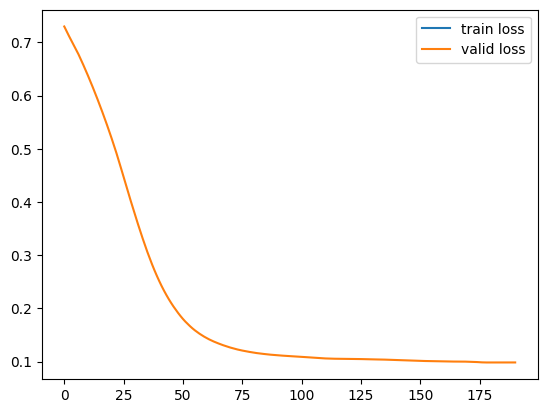

In [71]:
## loss, acc 시각화
plt.plot(range(len(train_losses)), train_losses, label='train loss')
plt.plot(range(len(valid_losses)), valid_losses, label="valid loss")
plt.legend()
plt.show()

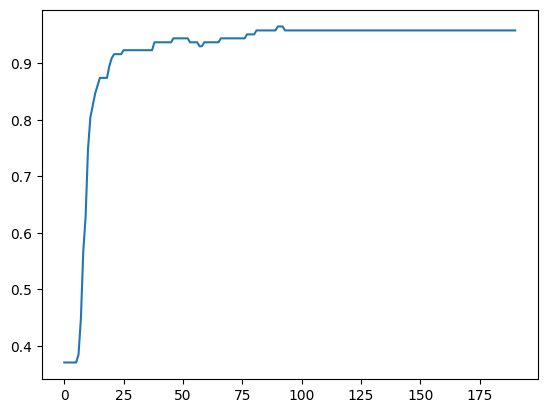

In [73]:
plt.plot(range(len(valid_acces)), valid_acces)
plt.show()

In [75]:
best_model = torch.load(save_path, weights_only=False)
best_model

BreastCancerModel(
  (lr1): Linear(in_features=30, out_features=32, bias=True)
  (lr2): Linear(in_features=32, out_features=8, bias=True)
  (lr3): Linear(in_features=8, out_features=1, bias=True)
  (relu): ReLU()
  (logistic): Sigmoid()
)

In [76]:
def predict_bc(model, X, device="cpu"):
    # model로 X를 추론한 결과를 반환
    # label, 확률
    result = []
    with torch.no_grad():
        pred_proba = model(X) #[[0.8], [0.1], ...]
        pred_class = (pred_proba > 0.5).type(torch.int32) #[[1], [0], ...]
        for class_index, proba in zip(pred_class, pred_proba):
            # print(class_index, proba if class_index.item() == 1 else 1-proba)
            result.append((class_index.item(), proba if class_index.item() == 1 else 1-proba))
            # proba if class_index.item() == 1 else 1-proba
            ## proba: 양성일 확률
            # 모델이 예측한 class가 1: proba값을 확률사용.
            # 모델이 예측한 class가 0: 1-proba 값을 확률로 사용(양성확률를 음성확률로 변환.)
        return result

In [77]:
new_data = torch.tensor(X_test_scaled[:5], dtype=torch.float32)
# print(new_data.shape)
result = predict_bc(best_model, new_data, device)

In [78]:
result

[(1, tensor([0.9979])),
 (0, tensor([1.0000])),
 (0, tensor([0.9998])),
 (1, tensor([0.9998])),
 (0, tensor([0.9985]))]

# 모델 유형별 구현 정리

## 공통

-   Input layer(첫번째 Layer)의 in_features
    -   입력데이터의 feature(속성) 개수에 맞춰준다.
-   Hidden layer 수
    -   경험적(art)으로 정한다.
    -   Hidden layer에 Linear를 사용하는 경우 보통 feature 수를 줄여 나간다. (핵심 특성들을 추출해나가는 과정의 개념.)

## 회귀 모델

-   output layer의 출력 unit개수(out_features)
    -   정답의 개수
    -   ex
        -   집값: 1
        -   아파트가격, 단독가격, 빌라가격: 3 => y의 개수에 맞춘다.
-   출력 Layer에 적용하는 activation 함수
    -   일반적으로 **None**
    -   값의 범위가 설정되 있고 그 범위의 값을 출력하는 함수가 있을 경우
        -   ex) 0 ~ 1: logistic(Sigmoid), -1 ~ 1: hyperbolic tangent(Tanh)
-   loss함수
    -   MSELoss
-   평가지표
    -   MSE, RMSE, R square($R^2$)

## 다중분류 모델

-   output layer의 unit 개수
    -   정답 class(고유값)의 개수
-   출력 Layer에 적용하는 activation 함수
    -   Softmax: 클래스별 확률을 출력
-   loss함수
    -   **categrocial crossentropy**
    -   파이토치 함수
        -   **CrossEntropyLoss** = NLLLoss(정답) + LogSoftmax(모델 예측값)
        -   **NLLLoss**
            -   정답을 OneHot Encoding 처리 후 Loss를 계산한다.
            -   입력으로 LogSoftmax 처리한 모델 예측값과 onehot encoding 안 된 정답을 받는다.
        -   **LogSoftmax**
            -   입력값에 Softmax 계산후 그 Log를 계산한다.
                -   NLLLoss의 모델 예측값 입력값으로 처리할 때 사용한다.

```python
pred = model(input)
loss1 = nn.NLLLoss(nn.LogSoftmax(dim=-1)(pred), y)
# or
loss2 = nn.CrossEntropyLoss()(pred, y)
```

## 이진분류 모델

-   output layer의 unit 개수
    -   1개 (positive일 확률)
-   출력 Layer에 적용하는 activation 함수
    -   Sigmoid(Logistic)
-   loss 함수
    -   **Binary crossentropy**
    -   파이토치 함수: **BCELoss**
